In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [4]:
X[X['horsepower'].isnull()]

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
32,98.0,4,NaN,2046,19.0,71,1
126,200.0,6,NaN,2875,17.0,74,1
330,85.0,4,NaN,1835,17.3,80,2
336,140.0,4,NaN,2905,14.3,80,1
354,100.0,4,NaN,2320,15.8,81,2
374,151.0,4,NaN,3035,20.5,82,1


In [5]:
X.shape

(398, 7)

In [6]:
X = X.dropna()

In [7]:
X.shape

(392, 7)

In [8]:
y = y.drop([32,126,330,336,354,374])

In [9]:
y.shape

(392, 1)

In [10]:
X.isnull().sum()

displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [11]:
X.sample(10)

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
287,351.0,8,138.0,3955,13.2,79,1
341,173.0,6,110.0,2725,12.6,81,1
208,318.0,8,150.0,3940,13.2,76,1
298,350.0,8,125.0,3900,17.4,79,1
185,98.0,4,79.0,2255,17.7,76,1
103,400.0,8,150.0,4997,14.0,73,1
226,231.0,6,105.0,3425,16.9,77,1
21,107.0,4,90.0,2430,14.5,70,2
123,156.0,6,122.0,2807,13.5,73,3
54,72.0,4,69.0,1613,18.0,71,3


#Exploratory Data Analysis

In [ ]:
data = X.merge(y, left_index = True, right_index = True)
data.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


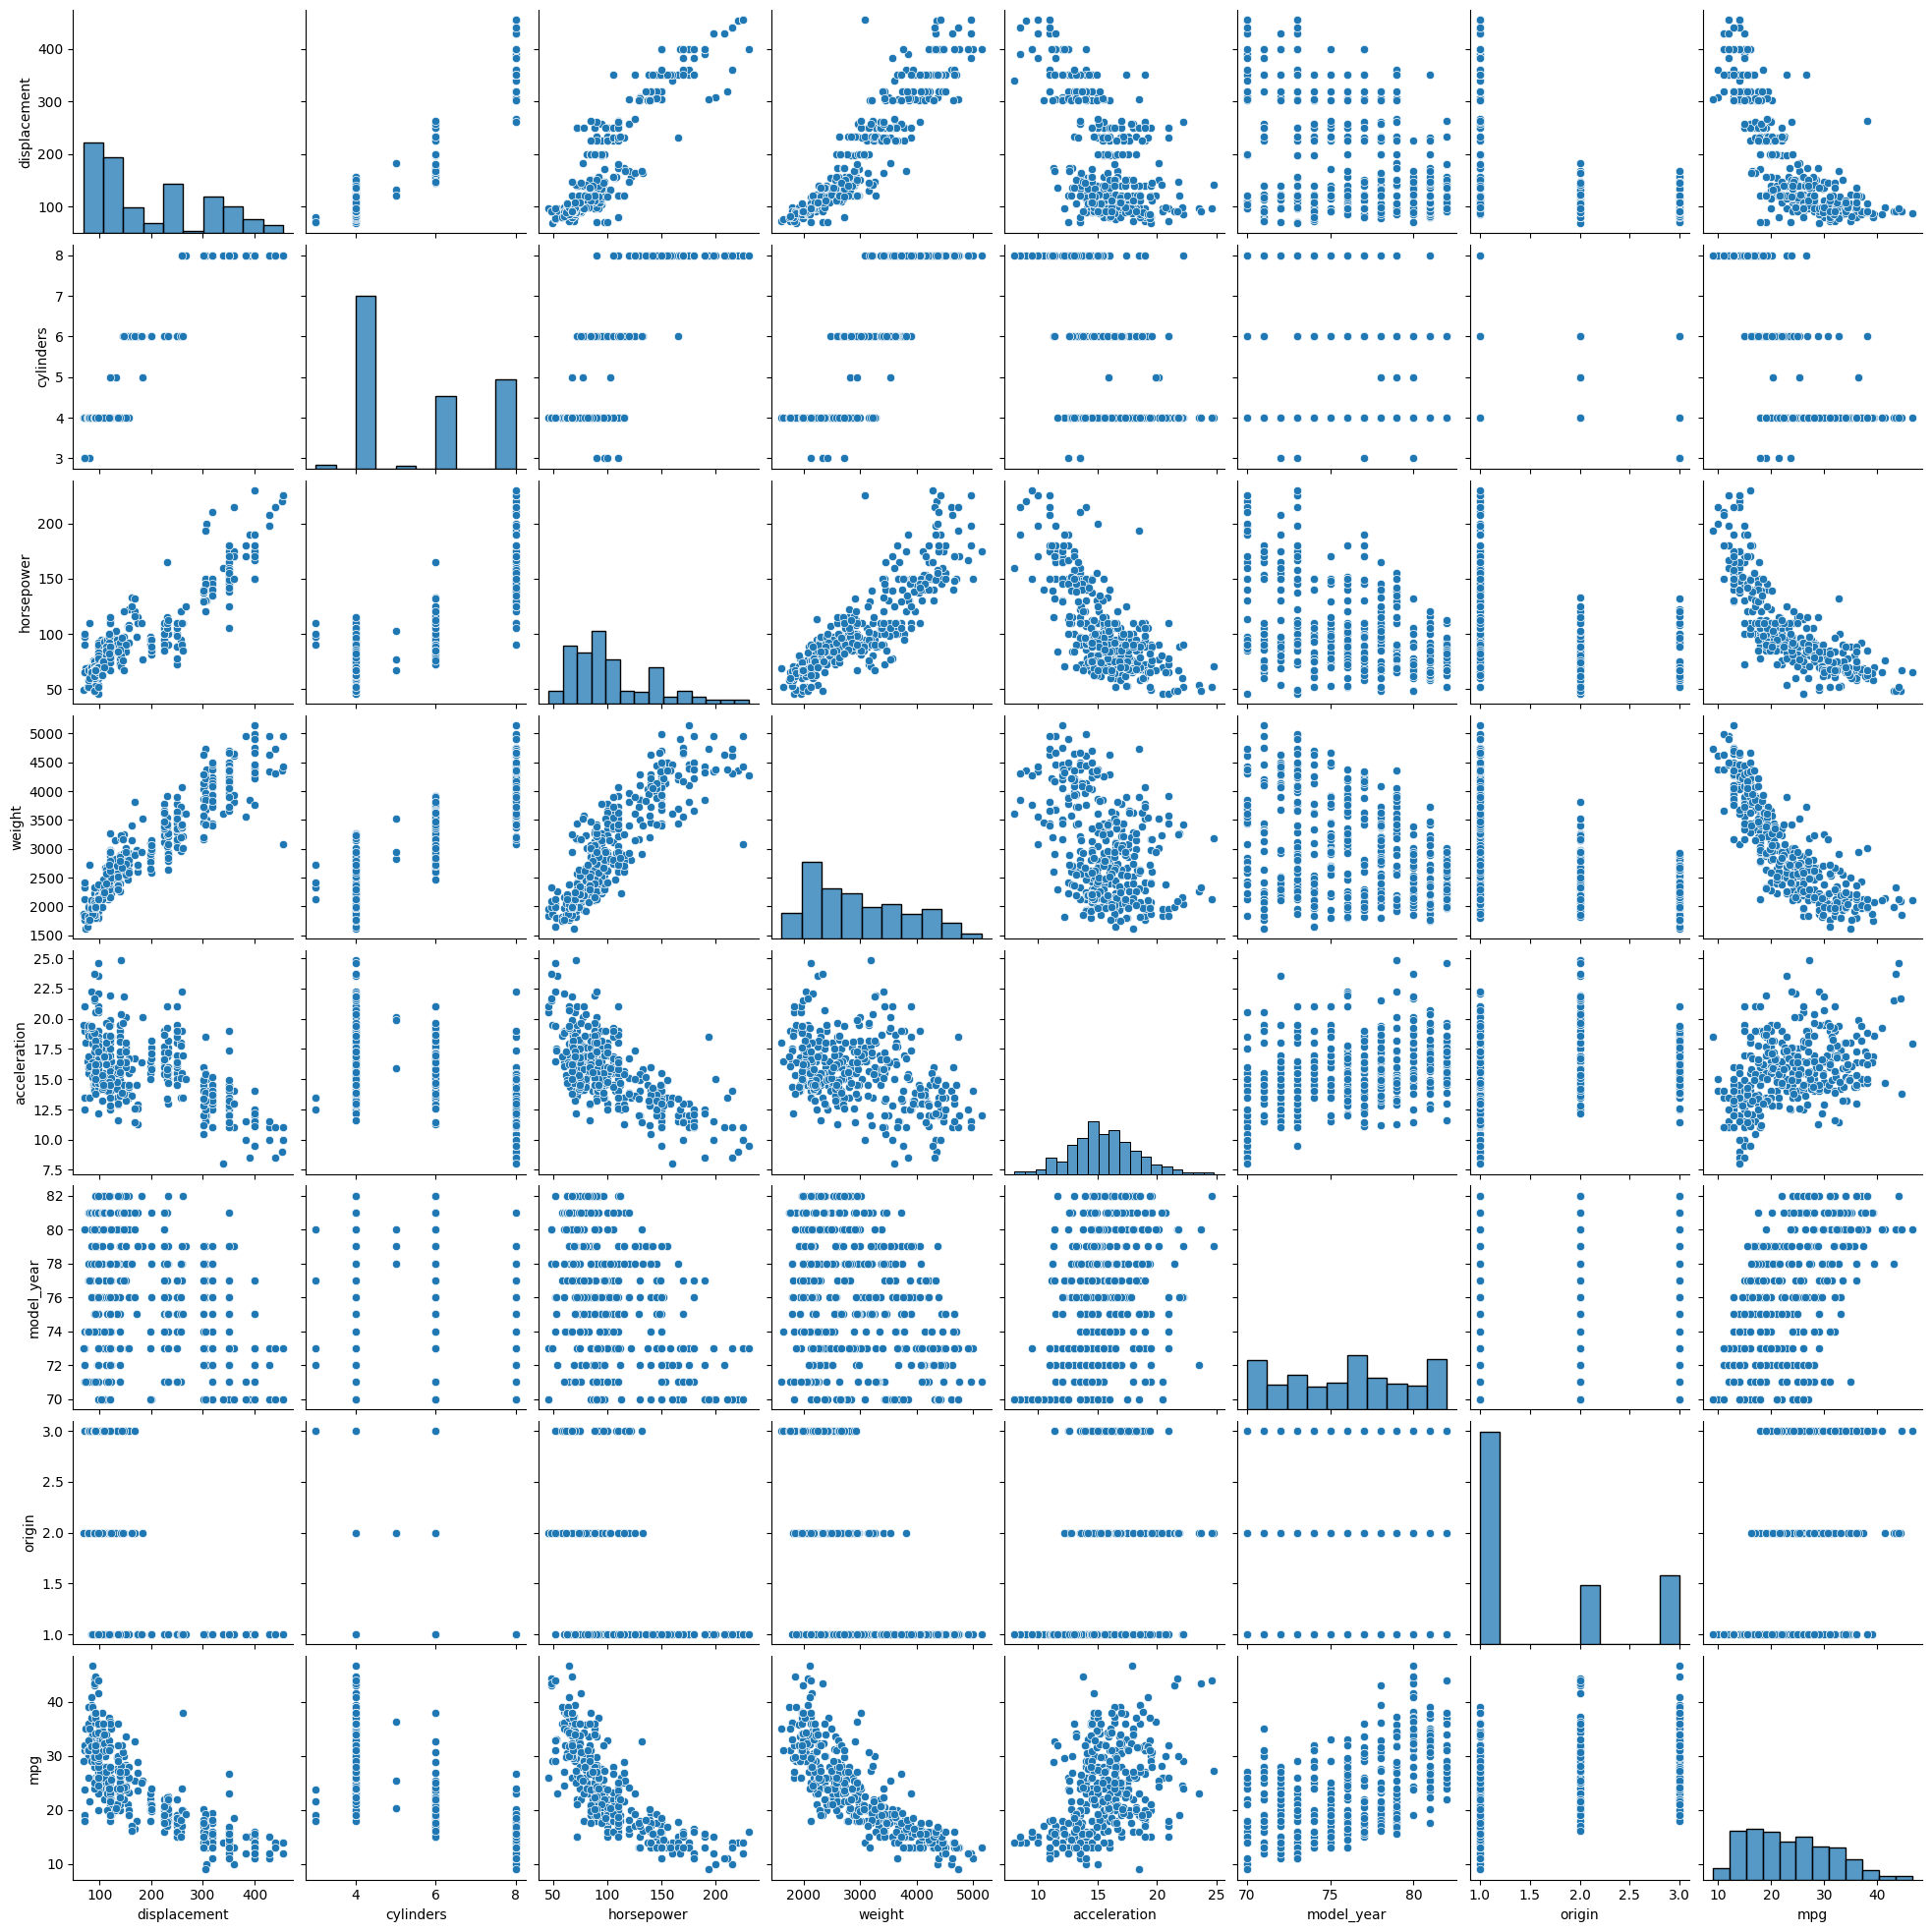

In [ ]:
sns.pairplot(data)

<ipython-input-53-7bb44f721ab8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['mpg'])


<Axes: xlabel='mpg', ylabel='Density'>

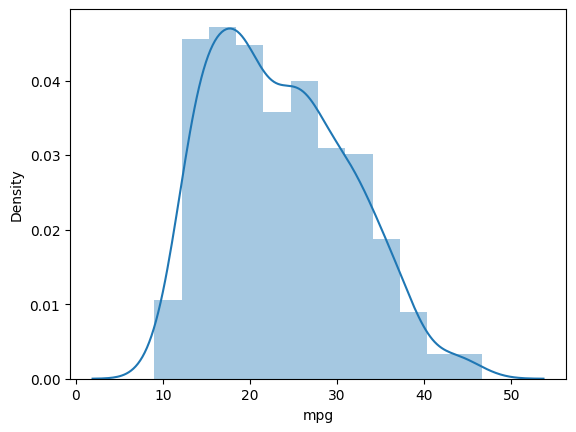

In [ ]:
sns.distplot(data['mpg'])

<Axes: >

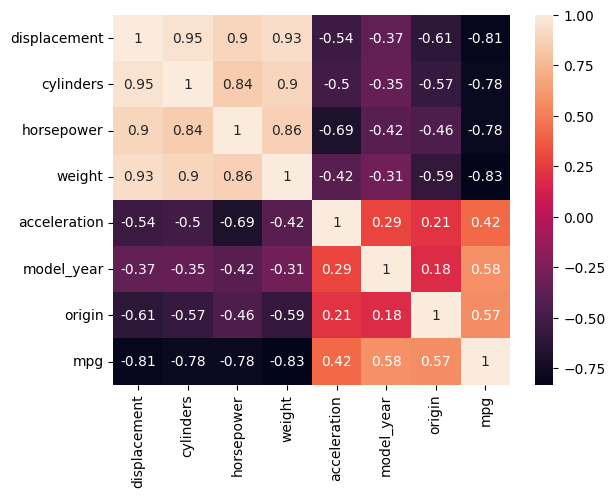

In [ ]:
sns.heatmap(data.corr(), annot=True)

# Without one hot encoder on origin

This study shows that normalization does not have any effect on the performance.

## Without normalization

In [ ]:
#Split Data into Train, Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Creating and Training the LinearRegression Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions = lm.predict(X_test)

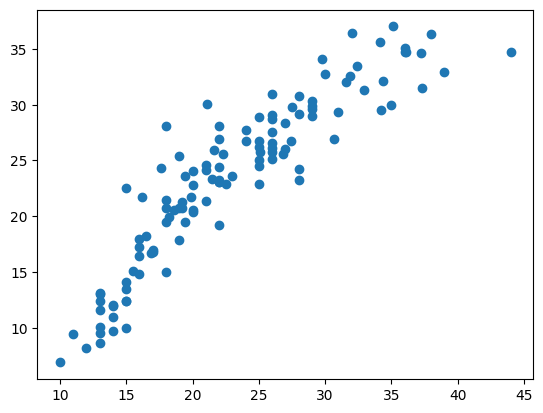

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
#Regression Evaluation Metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score: {}'.format(r2_score(y_test, predictions)))

MAE: 2.43802035035527
MSE: 10.065877783589281
RMSE: 3.1726767537190548
R2 Score: 0.8097361276184143


## With normalization

Rerun X, y from the starting part, Then run from here.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
scaler = MinMaxScaler().fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)

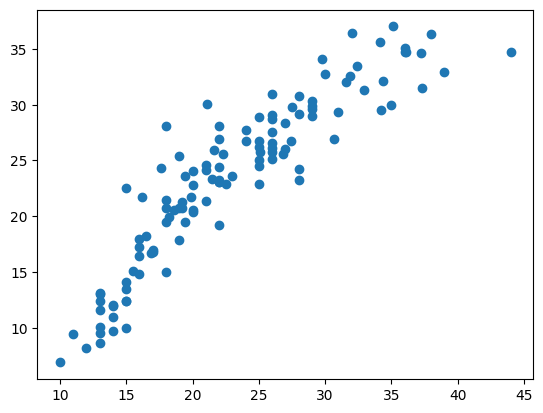

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score: {}'.format(r2_score(y_test, predictions)))

MAE: 2.438020350355282
MSE: 10.06587778358933
RMSE: 3.1726767537190628
R2 Score: 0.8097361276184133


#With one hot encoder on "origin" column

Run start part of the code to again get the X and y. Then next.

## making encoded

In [ ]:
X['origin'].unique()

array([1, 3, 2])

In [ ]:
from keras.utils import to_categorical

# one hot encode
encoded = to_categorical(X['origin'].values)

In [ ]:
# Create a DataFrame with the one-hot encoded 'Origin' column
encoded_origin_df = pd.DataFrame(encoded)

In [ ]:
encoded_origin_df.shape

(392, 4)

In [ ]:
encoded_origin_df

,0,1,2,3
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
387,0.0,1.0,0.0,0.0
388,0.0,0.0,1.0,0.0
389,0.0,1.0,0.0,0.0
390,0.0,1.0,0.0,0.0


In [ ]:
encoded_origin_df = encoded_origin_df.drop(columns=[0])

In [ ]:
encoded_origin_df

,1,2,3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
387,1.0,0.0,0.0
388,0.0,1.0,0.0
389,1.0,0.0,0.0
390,1.0,0.0,0.0


In [ ]:
X

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1
394,97.0,4,52.0,2130,24.6,82,2
395,135.0,4,84.0,2295,11.6,82,1
396,120.0,4,79.0,2625,18.6,82,1


In [ ]:
X = X.drop(columns=['origin'])

In [ ]:
X

,displacement,cylinders,horsepower,weight,acceleration,model_year
0,307.0,8,130.0,3504,12.0,70
1,350.0,8,165.0,3693,11.5,70
2,318.0,8,150.0,3436,11.0,70
3,304.0,8,150.0,3433,12.0,70
4,302.0,8,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82
394,97.0,4,52.0,2130,24.6,82
395,135.0,4,84.0,2295,11.6,82
396,120.0,4,79.0,2625,18.6,82


In [ ]:
# X dataframe has index values, where some index are missing due to deletion. But encoded_origin_df has sequencially index
# we have to get same type of index for X, so that joining gets satisfied properly
X_df = pd.DataFrame(X.values)

In [ ]:
X_df

,0,1,2,3,4,5
0,307.0,8.0,130.0,3504.0,12.0,70.0
1,350.0,8.0,165.0,3693.0,11.5,70.0
2,318.0,8.0,150.0,3436.0,11.0,70.0
3,304.0,8.0,150.0,3433.0,12.0,70.0
4,302.0,8.0,140.0,3449.0,10.5,70.0
...,...,...,...,...,...,...
387,140.0,4.0,86.0,2790.0,15.6,82.0
388,97.0,4.0,52.0,2130.0,24.6,82.0
389,135.0,4.0,84.0,2295.0,11.6,82.0
390,120.0,4.0,79.0,2625.0,18.6,82.0


In [ ]:
# Concatenate the one-hot encoded 'Origin' dataset with the original DataFrame
X_encoded = pd.concat([X_df, encoded_origin_df], axis=1)

In [ ]:
X_encoded

,0,1,2,3,4,5,1,2,3
0,307.0,8.0,130.0,3504.0,12.0,70.0,1.0,0.0,0.0
1,350.0,8.0,165.0,3693.0,11.5,70.0,1.0,0.0,0.0
2,318.0,8.0,150.0,3436.0,11.0,70.0,1.0,0.0,0.0
3,304.0,8.0,150.0,3433.0,12.0,70.0,1.0,0.0,0.0
4,302.0,8.0,140.0,3449.0,10.5,70.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
387,140.0,4.0,86.0,2790.0,15.6,82.0,1.0,0.0,0.0
388,97.0,4.0,52.0,2130.0,24.6,82.0,0.0,1.0,0.0
389,135.0,4.0,84.0,2295.0,11.6,82.0,1.0,0.0,0.0
390,120.0,4.0,79.0,2625.0,18.6,82.0,1.0,0.0,0.0


##Without normalization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions = lm.predict(X_test)

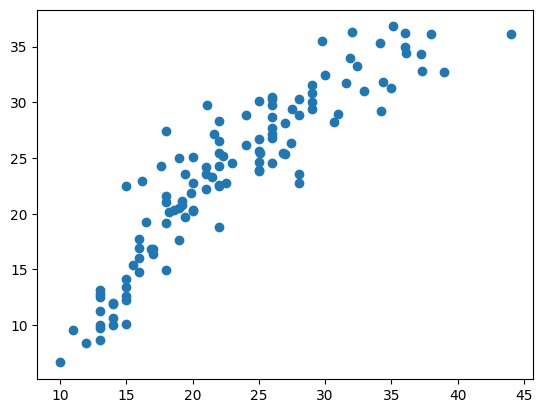

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
#Regression Evaluation Metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score: {}'.format(r2_score(y_test, predictions)))

MAE: 2.5344897258611
MSE: 10.344169215429295
RMSE: 3.216235254988244
R2 Score: 0.804475900282968


Run start part of the code to again get the X and y.

Then encode it.

Then next.

## with normalization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [ ]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
scaler = MinMaxScaler().fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)

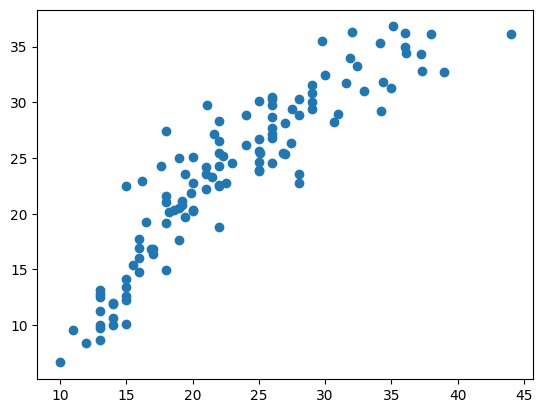

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score: {}'.format(r2_score(y_test, predictions)))

MAE: 2.5344897258611176
MSE: 10.344169215429362
RMSE: 3.2162352549882547
R2 Score: 0.8044759002829667


#Without the "Origin" column

In [ ]:
X = X.drop(columns=['origin'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions = lm.predict(X_test)

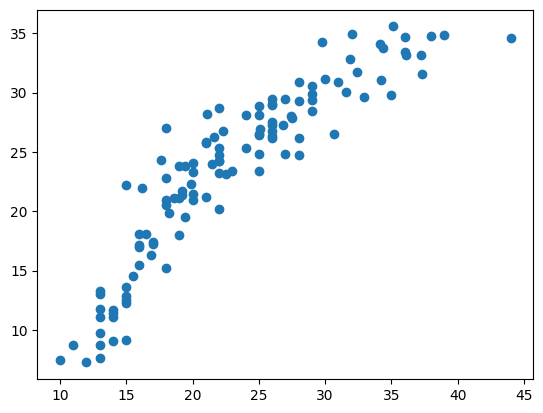

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
#Regression Evaluation Metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score: {}'.format(r2_score(y_test, predictions)))

MAE: 2.5402870152705352
MSE: 10.175162530636138
RMSE: 3.189853057843909
R2 Score: 0.807670441981015


# ANN

## Without normalization

In [37]:
#Split Data into Train, Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=7, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))

In [32]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
epochs_hist = model.fit(X_train, y_train, epochs=500, batch_size=25,  verbose=1)

Epoch 1/700
11/11 [==============================] - 1s 2ms/step - loss: 165086.5938
Epoch 2/700
11/11 [==============================] - 0s 2ms/step - loss: 19789.9590
Epoch 3/700
11/11 [==============================] - 0s 2ms/step - loss: 2906.9241
Epoch 4/700
11/11 [==============================] - 0s 2ms/step - loss: 4069.8599
Epoch 5/700
11/11 [==============================] - 0s 2ms/step - loss: 955.2852
Epoch 6/700
11/11 [==============================] - 0s 2ms/step - loss: 796.1885
Epoch 7/700
11/11 [==============================] - 0s 3ms/step - loss: 670.2583
Epoch 8/700
11/11 [==============================] - 0s 2ms/step - loss: 577.6578
Epoch 9/700
11/11 [==============================] - 0s 2ms/step - loss: 572.6279
Epoch 10/700
11/11 [==============================] - 0s 2ms/step - loss: 541.0903
Epoch 11/700
11/11 [==============================] - 0s 2ms/step - loss: 529.2453
Epoch 12/700
11/11 [==============================] - 0s 2ms/step - loss: 513.2628
Epoch 

In [34]:
predictions = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


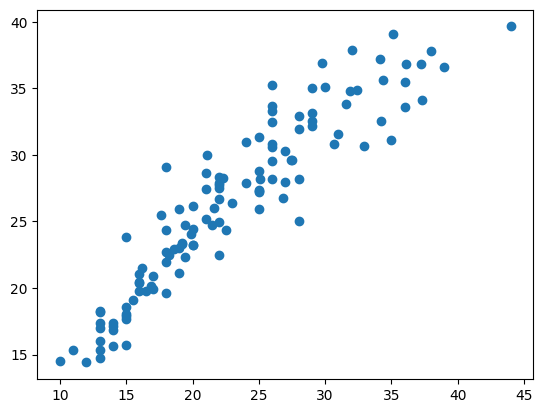

In [35]:
plt.scatter(y_test,predictions)

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score: {}'.format(r2_score(y_test, predictions)))

MAE: 3.8540587118116476
MSE: 19.222107922758788
RMSE: 4.384302444261662
R2 Score: 0.6366662930595667


## with normalization

In [ ]:
#Split Data into Train, Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
scaler = MinMaxScaler().fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [40]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=7, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))

In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
epochs_hist = model.fit(X_train, y_train, epochs=500, batch_size=25,  verbose=1)

Epoch 1/500
11/11 [==============================] - 1s 4ms/step - loss: 0.2882
Epoch 2/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1319
Epoch 3/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 4/500
11/11 [==============================] - 0s 3ms/step - loss: 0.0211
Epoch 5/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0189
Epoch 6/500
11/11 [==============================] - 0s 5ms/step - loss: 0.0150
Epoch 7/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0136
Epoch 8/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0130
Epoch 9/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0124
Epoch 10/500
11/11 [==============================] - 0s 5ms/step - loss: 0.0121
Epoch 11/500
11/11 [==============================] - 0s 4ms/step - loss: 0.0116
Epoch 12/500
11/11 [==============================] - 0s 8ms/step - loss: 0.0113
Epoch 13/500
11/11 [=================

In [43]:
predictions = model.predict(X_test)

4/4 [==============================] - 0s 8ms/step


In [44]:
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)

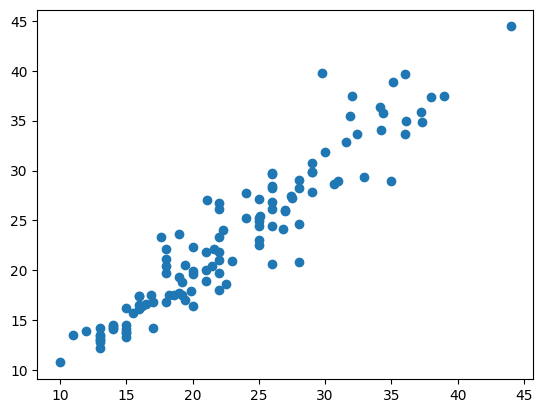

In [45]:
plt.scatter(y_test,predictions)

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score: {}'.format(r2_score(y_test, predictions)))

MAE: 1.8116878396373681
MSE: 6.1860249715601725
RMSE: 2.487172083222263
R2 Score: 0.8830725853181836


# The conclusion - ANN is best with normalization